In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('disburse.csv',delimiter=';')
print(df.head())

      bulan                                        pekerjaan  \
0  februari                          Supervisi PLTA Jatigede   
1  februari                        Pembangunan PLTA Jatigede   
2  februari  SUTT 150 kV Padalarang Baru II  Padalarang Baru   
3  februari                    Ext 2 LB GI 150 kV Telukjambe   
4     maret                        Pembangunan PLTA Jatigede   

                kontraktor progres       rencana      proyeksi  \
0                    PLN E     NaN      3495451       3495451    
1  Sinohydro PP Consortium     NaN      5697066       5697066    
2                PT INDISI      0%      3708816       3708816    
3             PT INDOKOMAS      0%      2113385       2113385    
4  Sinohydro PP Consortium      0%    124078459     124078459    

  rencana_tagihan     realisasi keterangan  
0               0      3495451           0  
1               0      5697066           0  
2               0      3708816           0  
3               0      2113385        

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   bulan            95 non-null     object
 1   pekerjaan        95 non-null     object
 2   kontraktor       93 non-null     object
 3   progres          93 non-null     object
 4   rencana          95 non-null     object
 5   proyeksi         95 non-null     object
 6   rencana_tagihan  95 non-null     object
 7   realisasi        95 non-null     object
 8   keterangan       95 non-null     object
dtypes: object(9)
memory usage: 6.8+ KB


In [25]:
df['progres'] = df['progres'].fillna('0%')
print(df.head())

      bulan                                        pekerjaan  \
0  februari                          Supervisi PLTA Jatigede   
1  februari                        Pembangunan PLTA Jatigede   
2  februari  SUTT 150 kV Padalarang Baru II  Padalarang Baru   
3  februari                    Ext 2 LB GI 150 kV Telukjambe   
4     maret                        Pembangunan PLTA Jatigede   

                kontraktor progres       rencana      proyeksi  \
0                    PLN E      0%      3495451       3495451    
1  Sinohydro PP Consortium      0%      5697066       5697066    
2                PT INDISI      0%      3708816       3708816    
3             PT INDOKOMAS      0%      2113385       2113385    
4  Sinohydro PP Consortium      0%    124078459     124078459    

  rencana_tagihan     realisasi keterangan  
0               0      3495451           0  
1               0      5697066           0  
2               0      3708816           0  
3               0      2113385        

In [26]:
# Daftar bulan dalam urutan yang benar
bulan_order = [#'januari', 
                            'februari', 'maret', #'april', 'mei', 
                            'juni', 
               'juli', 'agustus', 'september', 'oktober', 'november', 'desember']

# Mengonversi kolom 'bulan' menjadi tipe kategori dengan urutan yang benar
df['bulan'] = pd.Categorical(df['bulan'], categories=bulan_order, ordered=True)

# Melakukan sort berdasarkan kolom 'bulan'
df = df.sort_values(by='bulan')

# Menampilkan hasil yang sudah diurutkan
print(df.head())

      bulan                                        pekerjaan  \
0  februari                          Supervisi PLTA Jatigede   
1  februari                        Pembangunan PLTA Jatigede   
2  februari  SUTT 150 kV Padalarang Baru II  Padalarang Baru   
3  februari                    Ext 2 LB GI 150 kV Telukjambe   
8     maret       SUTT 150 Kv Rancaekek  Sunyaragi Section 1   

                kontraktor progres     rencana    proyeksi rencana_tagihan  \
0                    PLN E      0%    3495451     3495451                0   
1  Sinohydro PP Consortium      0%    5697066     5697066                0   
2                PT INDISI      0%    3708816     3708816                0   
3             PT INDOKOMAS      0%    2113385     2113385                0   
8              PT Multifab      0%    1187584     1187584                0   

    realisasi keterangan  
0    3495451           0  
1    5697066           0  
2    3708816           0  
3    2113385           0  
8    118758

In [27]:
df['rencana'] = df['rencana'].astype(int)
df['realisasi'] = df['realisasi'].astype(int)
df['proyeksi'] = df['proyeksi'].astype(int)

In [28]:
df_realisasi = df.groupby('bulan').agg({'realisasi':'sum'})
df_realisasi

/var/folders/hs/gx1zs0vs32b3pdq7fd0sskq80000gn/T/ipykernel_17849/1152995547.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_realisasi = df.groupby('bulan').agg({'realisasi':'sum'})


,realisasi
bulan,
februari,15014718
maret,142347286
juni,33213019
juli,38561098
agustus,11648366
september,78349522
oktober,26097724
november,51842105
desember,28923666


In [29]:
# Menyimpan DataFrame ke file CSV
df_realisasi.to_csv('realisasi_bulanan.csv', index=False, sep=',') 

<Figure size 700x2000 with 0 Axes>

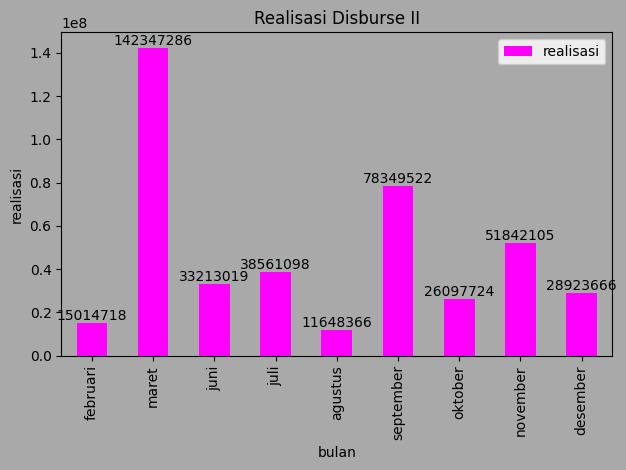

In [30]:
plt.figure(figsize=(7,20))
df_realisasi.plot(kind='bar', color='magenta', )
plt.xlabel('bulan')
plt.ylabel('realisasi')
plt.title('Realisasi Disburse II')

plt.gcf().set_facecolor('darkgrey')
plt.gca().set_facecolor('darkgrey')

for index, value in enumerate(df_realisasi['realisasi']):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')  # Menambahkan angka di atas batang


plt.tight_layout()
plt.show()

In [31]:
df.describe()

,rencana,proyeksi,realisasi
count,9.500000e+01,9.500000e+01,9.500000e+01
mean,5.641915e+06,4.777432e+06,5.108362e+06
std,1.507834e+07,1.485644e+07,1.483687e+07
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.187584e+06,8.396020e+05,1.187584e+06
75%,3.864589e+06,2.879313e+06,3.706389e+06
max,1.240785e+08,1.240785e+08,1.240785e+08


In [32]:
rata_proyeksi = df.groupby('bulan')['proyeksi'].mean
rata_realisasi = df.groupby('bulan')['realisasi'].mean

print(rata_proyeksi)
print(rata_realisasi)

<bound method GroupBy.mean of <pandas.core.groupby.generic.SeriesGroupBy object at 0x11806ae70>>
<bound method GroupBy.mean of <pandas.core.groupby.generic.SeriesGroupBy object at 0x118045fa0>>


/var/folders/hs/gx1zs0vs32b3pdq7fd0sskq80000gn/T/ipykernel_17849/2936304533.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rata_proyeksi = df.groupby('bulan')['proyeksi'].mean
/var/folders/hs/gx1zs0vs32b3pdq7fd0sskq80000gn/T/ipykernel_17849/2936304533.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rata_realisasi = df.groupby('bulan')['realisasi'].mean


TypeError: float() argument must be a string or a real number, not 'method'

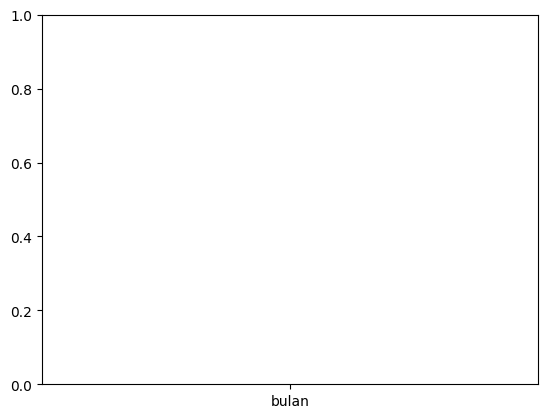

In [35]:
plt.plot('bulan', rata_realisasi)
plt.plot('bulan', rata_proyeksi)
plt.legend()
plt.show()